

# Project: The Movie Database (TMDb) Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.
>
>The columns *'budget', 'revenue', 'budget_adj', 'revenue_adj'* currency is not given so we will assume that it is in **US Dollars** and for *'runtime'* we will assume that it is in **minutes**.
>
>Followign is the list of questions that i am going to analyze and answer :
>
>***Q1- Which movie has earned highest and lowest profit?
<br>Q2- Which movie has the highest and lowest revenue?
<br>Q3- Which movie has the highest and lowest budget?
<br>Q4- Which movie has the longest and shortest run time?
<br>Q5- What is average runtime of movies yearwise?
<br>Q6- Yearwise which movie earned the most profit?
<br>Q7- Who are the top 10 most occurring cast members?
<br>Q8- What are the most occurring genres of movies?
<br>Q9- What are top 10 most occurring cast in profitable movies?
<br>Q10- What are top 5 directors who made profitable movies?***

In [202]:
# importing modules required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> I have first loaded the data from csv file and then observed general properties of data, I found there is a need of cleaning the data. And based on questions that, I imposed for analysis I have to delete certain columns.

### General Properties

In [203]:
# Loading the csv file and looking first few rows of data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [204]:
# checking the shape of data set.
print('This data contains {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

This data contains 10866 rows and 21 columns.


In [205]:
# Generating descriptive statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [206]:
# checking for missing values and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>we can see some columns has **missing values** like ***imdb_id, cast, homepage, director, tagline, keywords, overview, geners, production_companies.***

### Data Cleaning 

>Before answering the above questions we need a clean dataset which has columns and rows we need for calculations.
>First, lets clean up the columns. We will only keep the columns we need and remove the rest of them.

In [207]:
# dropping columns which are not needed for analysis
df.drop(['id','imdb_id','popularity','budget_adj','revenue_adj','homepage',
         'keywords','overview','vote_count','vote_average','production_companies','tagline'], axis=1, inplace = True)

>For analysis we dont need some colums like -  id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, >overview,tagline, production_companies, vote_count and vote_average.

In [208]:
# checking the shape of data set.
print('This data contains {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

This data contains 10866 rows and 9 columns.


In [209]:
# checking for missing values and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
release_year      10866 non-null int64
dtypes: int64(4), object(5)
memory usage: 764.1+ KB


>We can see ***cast, director and geners*** contains **missing value**. sincs these are the categorical columns we will remove rows >containing missing values. 

In [210]:
# dropping rows with missing values.
df.dropna(inplace = True)

In [211]:
# checking for null values and dtypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 9 columns):
budget            10732 non-null int64
revenue           10732 non-null int64
original_title    10732 non-null object
cast              10732 non-null object
director          10732 non-null object
runtime           10732 non-null int64
genres            10732 non-null object
release_date      10732 non-null object
release_year      10732 non-null int64
dtypes: int64(4), object(5)
memory usage: 838.4+ KB


>Now there is no missing values present in our data.

In [212]:
# checking the shape of data set.
print('This data contains {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

This data contains 10732 rows and 9 columns.


In [213]:
# checking for duplicate rows.
sum(df.duplicated())

1

In [214]:
# removing duplicate rows.
df.drop_duplicates(inplace = True)

In [215]:
# rechecking for duplicates roes.
sum(df.duplicated())

0

In [216]:
# checking the shape of data set.
print('This data contains {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

This data contains 10731 rows and 9 columns.


In [217]:
# generating descriptive statsitics.
df.describe()

,budget,revenue,runtime,release_year
count,1.073100e+04,1.073100e+04,10731.000000,10731.000000
mean,1.480365e+07,4.031989e+07,102.468829,2001.259622
std,3.106456e+07,1.176524e+08,30.493873,12.820151
min,0.000000e+00,0.000000e+00,0.000000,1960.000000
25%,0.000000e+00,0.000000e+00,90.000000,1995.000000
50%,0.000000e+00,0.000000e+00,99.000000,2006.000000
75%,1.600000e+07,2.500000e+07,112.000000,2011.000000
max,4.250000e+08,2.781506e+09,900.000000,2015.000000


>We can see minimum values for ***budget, revenue and run time*** is **0**. practically it is not possible that means 0 is indicating missing information.

In [218]:
# removing rows where budget and revenue is 0.
df = df.query('budget != 0 and revenue != 0')

In [219]:
# generting discriptive statistics.
df.describe()

,budget,revenue,runtime,release_year
count,3.849000e+03,3.849000e+03,3849.000000,3849.000000
mean,3.724886e+07,1.078148e+08,109.217459,2001.258249
std,4.221699e+07,1.766175e+08,19.914141,11.285642
min,1.000000e+00,2.000000e+00,15.000000,1960.000000
25%,1.000000e+07,1.367069e+07,95.000000,1995.000000
50%,2.400000e+07,4.490726e+07,106.000000,2004.000000
75%,5.000000e+07,1.243052e+08,119.000000,2010.000000
max,4.250000e+08,2.781506e+09,338.000000,2015.000000


In [220]:
# checking for null values and dtypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 9 columns):
budget            3849 non-null int64
revenue           3849 non-null int64
original_title    3849 non-null object
cast              3849 non-null object
director          3849 non-null object
runtime           3849 non-null int64
genres            3849 non-null object
release_date      3849 non-null object
release_year      3849 non-null int64
dtypes: int64(4), object(5)
memory usage: 300.7+ KB


In [221]:
# checking the shape of data set.
print('This data contains {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

This data contains 3849 rows and 9 columns.


In [222]:
# changing data type of release_date to datetime.
df['release_date']= pd.to_datetime(df['release_date'])

In [223]:
# checking for null vlues and dtypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 9 columns):
budget            3849 non-null int64
revenue           3849 non-null int64
original_title    3849 non-null object
cast              3849 non-null object
director          3849 non-null object
runtime           3849 non-null int64
genres            3849 non-null object
release_date      3849 non-null datetime64[ns]
release_year      3849 non-null int64
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 300.7+ KB


>Now we create a new column ***profit*** as difference between revenue and budget for further analysis. 

In [224]:
# creating new columns.
df['profit'] = df['revenue'] - df['budget']

In [225]:
df.head(5)

,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,228436354
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,185238201
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1868178225
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2015,1316249360


<a id='eda'></a>
## Exploratory Data Analysis




>Distribution of different columns. i have plotted histograms to know the distribution of quantitative columns of the data.

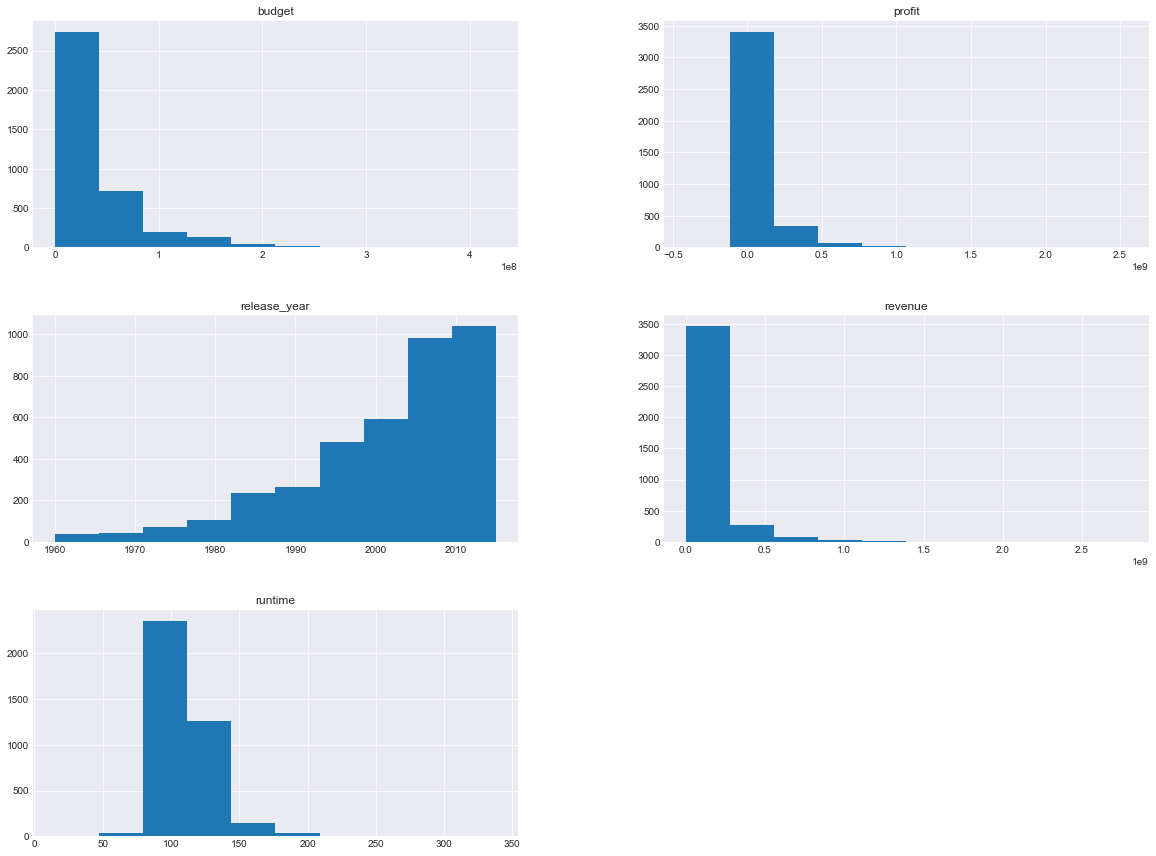

In [226]:
sns.set_style("darkgrid")
df.hist(figsize = (20,15));

> we can see the budget, pofit , revenue, runtime are right skewed and release year is left skewed.

>Creating function to get rows with maximum and minimum values of selected column.

In [227]:
def min_max(dataframe, column_name):
    '''This function gives max and mini values'''
   
    min_ind = dataframe[column_name].idxmin()
    max_ind = dataframe[column_name].idxmax()
    min_df = dataframe.loc[[min_ind]]
    max_df = dataframe.loc[[max_ind]]
    min_max_df =min_df.append(max_df)
    min_max_df.index = ['min_value','max_value']
    return min_max_df


>#### Research Question 1- which movies had maximum and minimum profit?

In [228]:
# calculating maximun and minimum value of profit.
min_max_profit = min_max(df,'profit')
min_max_profit

,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
min_value,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,2010,-413912431
max_value,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,2009,2544505847


>The Warrior's Way has earned the least profit i.e. loss of  -413912431(in us dollar)
<br>Avatar hs earned the most profit i.e. 2544505847(in us dollar)

>#### Research Question 2- which movies had maximum and minimum revenue?

In [229]:
# calculating maximun and minimum value of revenue.
min_max_revenue = min_max(df,'revenue')
min_max_revenue

,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
min_value,6000000,2,Shattered Glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,94,Drama|History,2003-11-14,2003,-5999998
max_value,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,2009,2544505847


>Shattered Glass has low revenue of 2(in us dollar)
<br>Avatar has high revenue of 2781505847(in us dollar)

>#### Research Question 3- which movies had maximum and minimum budget?

In [230]:
# calculating maximun and minimum value of budget.
min_max_budget = min_max(df,'budget')
min_max_budget

,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
min_value,1,100,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,Jeff Pollack,95,Comedy|Romance,1999-04-23,1999,99
max_value,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,2010,-413912431


>Lost & Found has low budget of 1(in us dollar)
<br>The Warrior's Way has high budget of 425000000(in us dollar)

>#### Research Question 4- which movies had maximum and minimum runtime?

In [231]:
# calculating maximun and minimum value of runtime.
min_max_runtime = min_max(df,'runtime')
min_max_runtime

,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
min_value,10,5,Kid's Story,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...,Shinichiro Watanabe,15,Science Fiction|Animation,2003-06-02,2003,-5
max_value,18000000,871279,Carlos,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Olivier Assayas,338,Crime|Drama|Thriller|History,2010-05-19,2010,-17128721


>Kid's Story has minimum runtime of 15(in mins)
<br>Carlos has maximum runtime of 338(in mins)

>#### Research Question 5 - What is the movies average runtime yearwise?

In [232]:
# calculating mean avg time of movies groupby release_year
df_avg_runtime = df.groupby('release_year')['runtime'].mean()
df_avg_runtime.head()

release_year
1960    130.000000
1961    132.500000
1962    141.285714
1963    153.500000
1964    122.428571
Name: runtime, dtype: float64

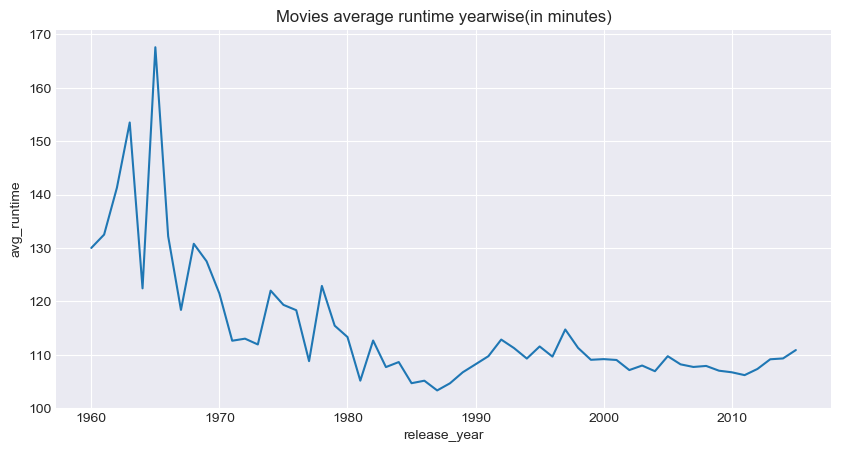

In [233]:
# plotting Movies average runtime yearwise(in minutes)
sns.set_style("darkgrid")
plt.figure(figsize=(10,5), dpi = 100)
df_avg_runtime.plot(kind = 'line',title = 'Movies average runtime yearwise(in minutes)')
plt.ylabel('avg_runtime');

> #### Research Question 6-Yearwise which movie earned the most profit?

In [234]:
# extracting index of maximum profit for each release_year
movie_prof_yr_ind = df.groupby('release_year')['profit'].idxmax()

# extracting subset of dataframe for those indexes
movie_prof_yr = df.loc[movie_prof_yr_ind]
movie_prof_year = movie_prof_yr[['release_year','original_title','profit']]
movie_prof_year.head()

,release_year,original_title,profit
10143,1960,Spartacus,48000000
10110,1961,One Hundred and One Dalmatians,211880014
9849,1962,Dr. No,58500000
10438,1963,From Russia With Love,76398765
9881,1964,Goldfinger,121400000


>We can see in year 1960 Spartacus earned most profit, similarly we can see for all the years

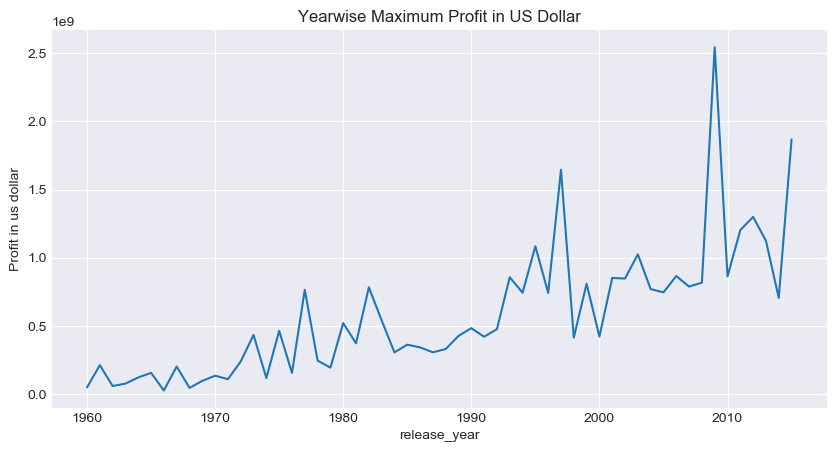

In [235]:
# extracting maximum profit for each release_year
df_profit_max = df.groupby('release_year')['profit'].max()

# plotting Yearwise Maximum Profit in US Dollar
sns.set_style("darkgrid")
plt.figure(figsize=(10,5), dpi = 100)
df_profit_max.plot(kind = 'line', title ='Yearwise Maximum Profit in US Dollar')
plt.ylabel('Profit in us dollar');

>Creating function that gives the value counts for each categorical  column_name

In [236]:
def categorical_count(dataframe,column_name):
    '''This function gives the value counts for each categorical  column_name'''
    temp = dataframe[column_name].str.cat(sep = '|')
    temp = temp.split('|')
    temp = pd.Series(temp)
    temp_count = temp.value_counts()
    
    return temp_count


> #### Research Question 7 - who are the top 10 most occurring cast members?

In [237]:
# finding top 10 most occuring cast
top_10_cast_count = categorical_count(df,'cast')[0:10]
top_10_cast_count

Robert De Niro        52
Bruce Willis          46
Samuel L. Jackson     44
Nicolas Cage          43
Matt Damon            36
Johnny Depp           35
Morgan Freeman        34
Harrison Ford         34
Tom Hanks             34
Sylvester Stallone    34
dtype: int64

> We can see Robert De Niro has done most movies 

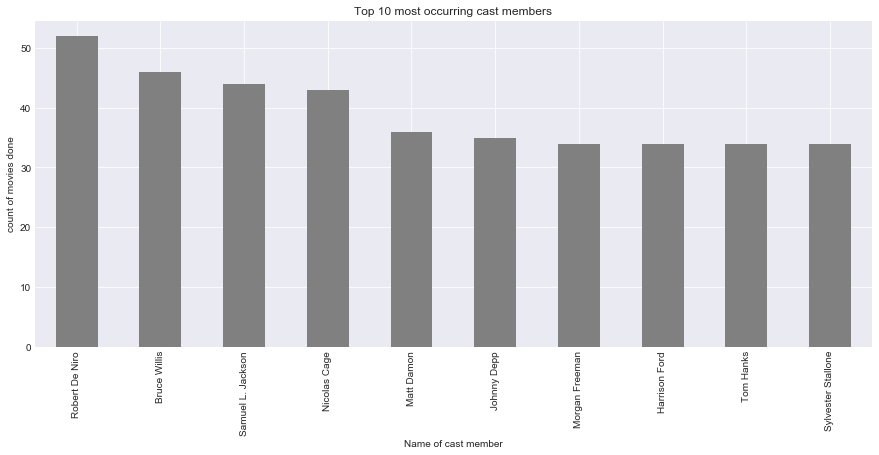

In [238]:
# plotting top 10 most occuring cast memebers
sns.set_style("darkgrid")
top_10_cast_count.plot(kind= 'bar', title='Top 10 most occurring cast members',color = 'gray', figsize=( 15,6))
plt.ylabel('count of movies done')
plt.xlabel('Name of cast member');

> #### Research Question 8 - What are the most occurring genres of movies?

In [239]:
# finding genres count 
genres_count = categorical_count(df,'genres')
genres_count

Drama              1753
Comedy             1357
Thriller           1203
Action             1085
Adventure           749
Romance             666
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               134
History             129
War                 119
Western              52
Documentary          31
Foreign              12
TV Movie              1
dtype: int64

>Drama genre has higest count

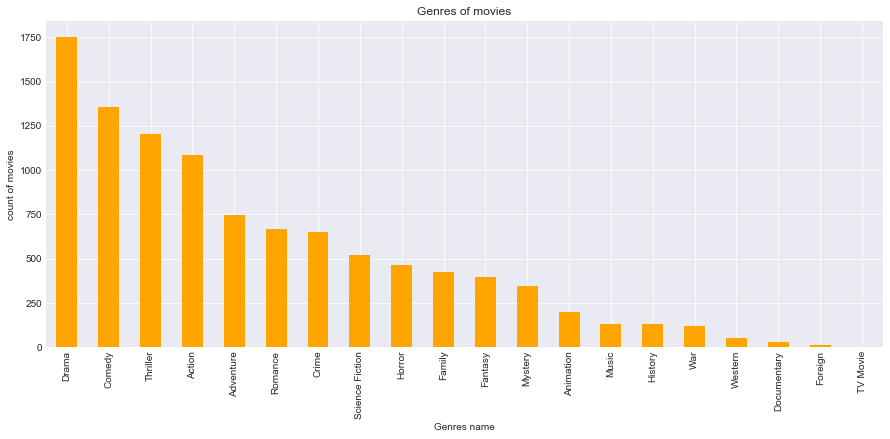

In [240]:
# plotting Genres of movies
sns.set_style("darkgrid")
genres_count.plot(kind= 'bar', title='Genres of movies',color = 'orange', figsize=( 15,6))
plt.ylabel('count of movies')
plt.xlabel('Genres name');

> #### Research Question 9 - What are top 10 most occurring cast in profitable movies?

In [241]:
# making a dataframe of profitable movies
df_profitable_movies = df[df['profit'] > 0]
df_profitable_movies.head()

,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,228436354
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,185238201
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1868178225
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2015,1316249360


In [242]:
# calling categorical_count function with  df_profitable_movies dataframe.
top_10_cast_profitable = categorical_count(df_profitable_movies,'cast')[0:10]
top_10_cast_profitable

Robert De Niro       38
Tom Hanks            33
Bruce Willis         33
Tom Cruise           31
Samuel L. Jackson    30
Brad Pitt            30
Denzel Washington    29
Harrison Ford        28
Morgan Freeman       28
Cameron Diaz         27
dtype: int64

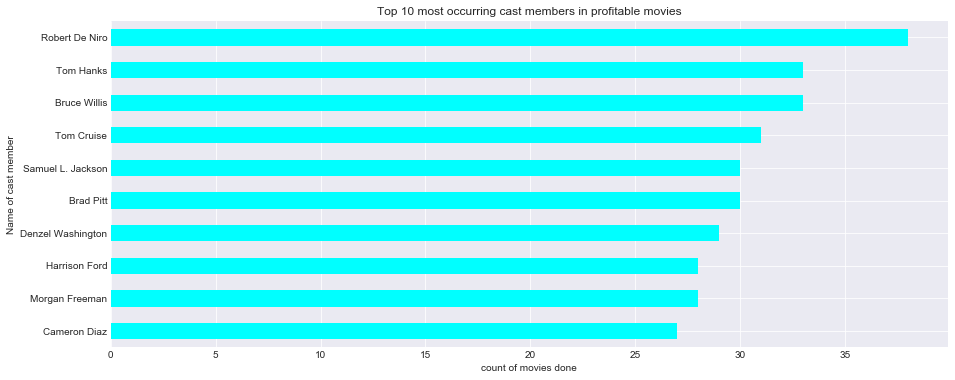

In [243]:
# plotting top 10 most occuring cast memebers
sns.set_style("darkgrid")
ax = top_10_cast_profitable.plot(kind= 'barh', title='Top 10 most occurring cast members in profitable movies',color = 'cyan', figsize=( 15,6))
plt.xlabel('count of movies done')
plt.ylabel('Name of cast member')
ax.invert_yaxis();

>Most of the profitable movies has done by the Robert De Niro. and all top 10 cast members that has done profitable movies is presented in above plot.

> #### Research Question 10 - What are top 5 directors who made profitable movies?

In [244]:
# calling categorical_count function with  df_profitable_movies dataframe.
top_5_directors = categorical_count(df_profitable_movies,'director')[0:5]
top_5_directors

Steven Spielberg    27
Clint Eastwood      21
Tim Burton          16
Ridley Scott        16
Robert Zemeckis     15
dtype: int64

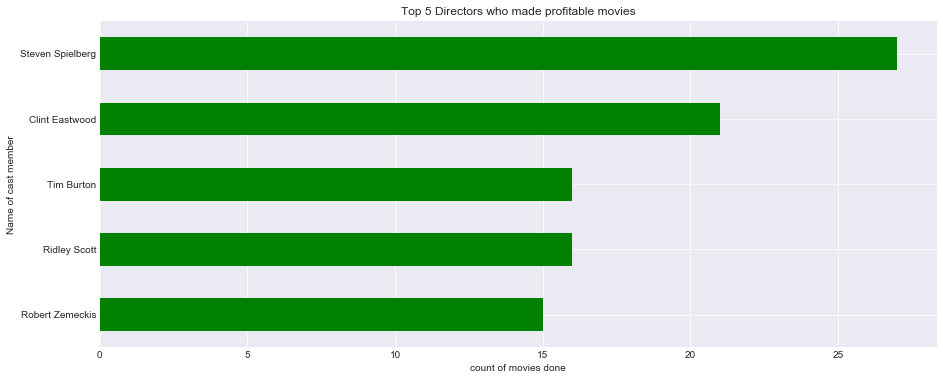

In [245]:
# plotting top 5 directors 
sns.set_style("darkgrid")
ax = top_5_directors.plot(kind= 'barh', title='Top 5 Directors who made profitable movies',color = 'green', figsize=( 15,6))
plt.xlabel('count of movies done')
plt.ylabel('Name of cast member')
ax.invert_yaxis();

> Steven Spielberg director has made most profitable movies(27).

<a id='conclusions'></a>
## Conclusions
 
> This is very intresting analysis and i cme up with lots of insights.
<br> I found movies having highest and lowest profit, budget and revenue.
<br> I also found most occurring cast and genres.
<br> I have done analysis to find movies that have earned profit.
<br> I also found the cast and diresctors with  most no of profitable movies. 

## Limitations 
><br> I have done this analysis based on data it might be possible that data is not error free.
<br> I have assumed that both revenue and budget are in unit us dollar and runtime is in minutes.
<br> Some values in revenue and budget is 0 that is practically not possiblewe assume it as missing values and have remove those rows.<br> In analysis I found the minimun revenue is 1 dollar but I have considered it as it is.